In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

In [3]:
inv = np.linalg.inv

# Generate sample time series data

Same as Linear Least Squares example.

In [4]:
t = np.linspace(0, 3, 600)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Two sensors

In [5]:
noise_mean = 0

noise_std_1 = 20
noise_std_2 = 0.5

v = []
v_std = []
noise_i = 1
n_chunks = 0
while len(v)<len(t):
    if noise_i == 1:
        noise_i = 2
        noise_std = noise_std_2
        chunk_size = 50
    else:
        noise_i = 1
        noise_std = noise_std_1
        chunk_size = 150

    v_std = np.hstack( (v_std, [noise_std]*chunk_size) )
    v = np.hstack( (v, np.random.normal(noise_mean, noise_std, chunk_size)) )
    n_chunks += 1

v_std = v_std[0:len(t)]
v = v[0:len(t)]

v_std = np.column_stack(v_std).T
v = np.column_stack(v).T

y_tilde = y+v

In [6]:
n_chunks

6

# Plotting

<Axes: xlabel='Time', ylabel='y'>

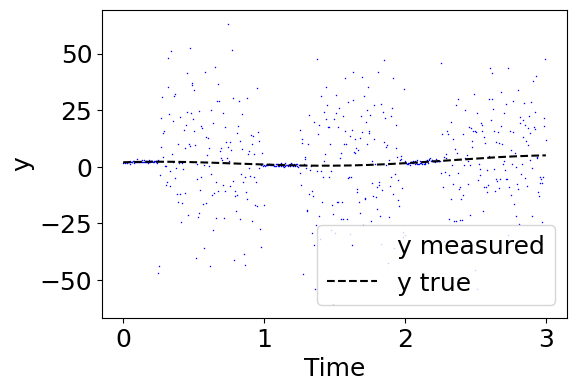

In [7]:
plot_tme(t, y, y_tilde)

# Candidate models

In [8]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Minimum Variance Estimate: Gauss-Markov Theorem

$\mathbf{\hat{x}}=(H^{\top}R^{-1}H)^{-1}H^{\top}R^{-1}\mathbf{\tilde{y}}$

In [53]:

#to increase R and make y_hat not follow y_true, multiplying by an identity matirx (H@H.T)
#if using very large numbers, R will change but not significantly.
#@H@H.T
R = np.diag( np.ravel(v_std)**2)
print(R)

[[100.25 100.   100.   ... 100.   100.   100.  ]
 [100.   100.25 100.   ... 100.   100.   100.  ]
 [100.   100.   100.25 ... 100.   100.   100.  ]
 ...
 [100.   100.   100.   ... 500.   100.   100.  ]
 [100.   100.   100.   ... 100.   500.   100.  ]
 [100.   100.   100.   ... 100.   100.   500.  ]]


### Model 1

In [54]:
x_1_hat = inv(model_1_H.T@inv(R)@model_1_H)@model_1_H.T@inv(R)@y_tilde

<Axes: xlabel='Time', ylabel='y'>

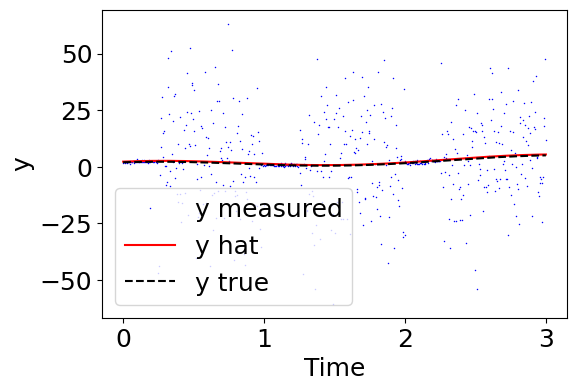

In [55]:
y_1_hat = model_1_H@x_1_hat
plot_tme(t, y, y_tilde, y_1_hat)

In [48]:
x_error = x_1_hat - x[0:3]
print(x_error)

[[0.01263058]
 [0.52911712]
 [0.29029471]]


# Residuals

<Axes: xlabel='Time', ylabel='y'>

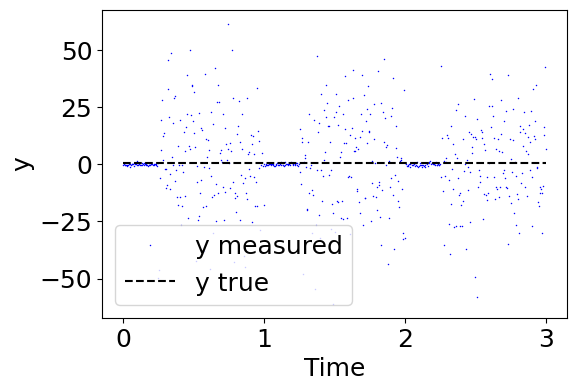

In [27]:
residuals_1 = y_tilde - y_1_hat
plot_tme(t, np.ones_like(t)*np.mean(residuals_1), residuals_1)

# Histogram of residuals

In [28]:
N1 = scipy.stats.norm(noise_mean, noise_std_1)
xr = np.linspace(-100, 100, 1000)
pdf1 = N1.pdf(xr)

N2 = scipy.stats.norm(noise_mean, noise_std_2)
pdf2 = N2.pdf(xr)

pdf = (pdf1*3 + pdf2*1) / 4

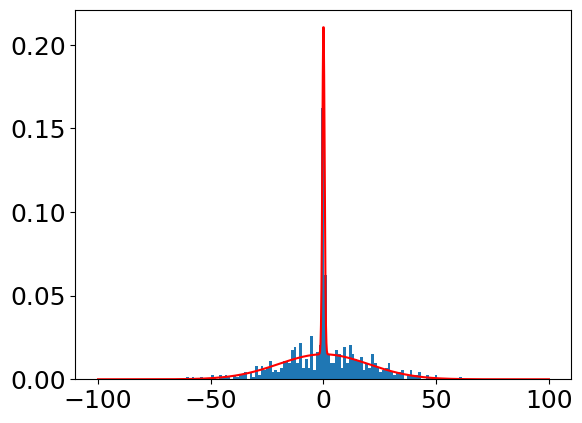

In [15]:
plt.hist(residuals_1, density=True, bins=100)
plt.plot(xr, pdf, color='red')

# Exercise

Use the wrong R for the minimum variance estimate. Do the errors in the estimate of x get worse?